# Xiaobo He <font color='blue'> Score:  52/52 </font>

#### <font color='blue'> Please see the corresponding cells for comments (in blue) on each individual question, if there's any. </font>

# MTH9879 Homework 2

Assigned: February 16, 2016.
Due: March 1, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points)  <font color=blue> Score: 10/10 </font>
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

Solution:
The probability of a market buy/sell at $t=3$ is $P_3(MB)= P_3(MS) = 5/22 $. 
The a limit buy/sell placed at at $t=1$ will only get filled if a market sell/buy occurs at both $t=2$ and $t=3$.
The probability of a new trader to submit a market buy/sell order at $t=2$ is $P_2(MB)= P_2(MS) = 5/22 $.
At $t=1$, we compute a buyer will choose as follows:


| Action         | Condition | Numerically |
|----------------|-----------|-------------|
| Limit buy (LB) |if $$(5.5\beta_1-5) \times 5/22\times5/22>(5.5\beta_1-6)\\$$and$$(5.5\beta_1-5)\times5/22\times5/22>0$$      |    $10/11<\beta_1<5558/5049$         |
| Market buy (MB)  |     if $$(5.5\beta_1-6)>(5.5\beta_1-5) \times 5/22 \times 5/22\\$$ and $5.5\beta_1-6>0$      |   $5558/5049<\beta_1<2$          |
| Do nothing     |     otherwise      |   $0<\beta_1<10/11$          |
        
Then we get at $t=1$, 

the probability of market buy $P_1(MB)=1/2*1/2*(2-5558/5049)=1135/5049$ 

the probability of limit buy $P_1(LB)=1/2*1/2*(5558/5049-10/11)=22/459$ 

the probability of market sell $P_1(MS)=P_1(MB)=1135/5049$ 

the probability of limit sell $P_1(LS)=P_1(LB)=22/459$ 

### 2. (4 points) <font color=blue> Score: 4/4 </font>
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

Solution:
As in the model predictions, an increase in book depth on the bid­side decreases the probability of a limit buy order, a decrease in book depth on the ask­side decreases the probability of a market sell order in subsequent periods and so decreases the probability of a limit buy order.

The reason is that in Parlour model, at most one limit order is allowed to be filled at each time step. As the result, the probability of a limit order to be filled will be lower when there is a larger book depth. For the same reason, shorter book depth on the ask side will attract the trader to submit limit sell orders and increase the probability of a limit buy order.

Also, there is a herd effect for the autocorrelated order signs. A market sell will decrease the bid side to increase the probability of a limit buy order. This in turns will decreases the probability of a subsequent market buy, and leads to a larger queue on the offer side. This positive feedback will leads to an increase in the probability of a market sell.


### Download R-code

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

## Cont-Kukanov optimal order placement

### 3. (16 points) <font color=blue> Score: 16/16 </font>

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

In [2]:
##### Solution (a)
sigma <- 0.01
price <- 37.50
t <- 0.01
lamda_u <- sigma * price * sqrt(t) * 100.0
lamda_u

[1] 3.75

##### Solution (b):

$h=0.5 \times 1 = 0.5 \ $ (in cents per share)

$f(BZX)=0.30\ $ (in cents per share), $f(BYX)=-0.03\ $ (in cents per share)

$r(BZX)=0.32\ $ (in cents per share), $r(BYX)=-0.03\ $ (in cents per share)

##### Solution (c):

$\bar \xi(BZX)=1\% \times 10500000=105000$, 

$\bar \xi(BYX)=1\% \times 1300000=13000$

##### Solution (d):

$\xi$ is log-normal random variable, so its variance is:

$$
\begin{align*}
var(\xi) = \bar{\xi}^2\left(e^{\sigma^2}-1\right)e^{-\frac{1}{2}2\sigma^2+\sigma^2}=\bar{\xi}^2\left(e^{\frac{1}{4}}-1\right) \\
\end{align*}
$$

The standard deviation is $SD(\xi)=\bar \xi \sqrt{e^{1/4}-1}$


In [3]:
##### Solution (e)

##set parameters
sigma <- 0.01
price <- 37.50
t <- 0.01
lambda_u <- 3.75
h <- 0.5
f_BZX <- 0.30
f_BYX <- -0.03
r_BZX <- 0.32
r_BYX <- -0.03
xi_bar_BZX <- 105000
xi_bar_BYX <- 13000
sigma <- 0.5

prob_BZX <- (2.0*h + f_BZX + r_BZX) / (lambda_u + h + r_BZX)
num_BZX <- xi_bar_BZX * exp(sigma*qnorm(prob_BZX) - 0.5*sigma*sigma)

prob_BYX <- (2.0*h + f_BYX + r_BYX) / (lambda_u + h + r_BYX)
num_BYX <- xi_bar_BYX * exp(sigma*qnorm(prob_BYX) - 0.5*sigma*sigma)

print ("BZX: L+Q:")
print (num_BZX)
print ("BYX: L+Q:")
print (num_BYX)

[1] "BZX: L+Q:"
[1] 76887.36
[1] "BYX: L+Q:"
[1] 7834.038


In [4]:
##### Solution (f)
OptimalSize_BZX <- 76887.36
OptimalSize_BYX <- 7834.038

MrktQuoteSize_BZX <- mean(c(1700,1558,1300,1100,700,800,900,900,1258,1900))
MrktQuoteSize_BYX <- mean(c(100,100,100,200,200,100,400,400,200,200))

MrktVol_BZX <- 1078386
MrktVol_BYX <- 310861

ratio1 <- OptimalSize_BZX / OptimalSize_BYX
ratio2 <- MrktQuoteSize_BZX / MrktQuoteSize_BYX
ratio3 <- MrktVol_BZX / MrktVol_BYX

print (ratio1)
print (ratio2)
print (ratio3)

[1] 9.814525
[1] 6.058
[1] 3.46903


The ratio of optimal quote size is 9.814525

The ratio of market quote size is 6.058

The ratio of market volume is 3.46903

They are roughly similar and on the same order of magnitude.


## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points) <font color=blue> Score: 16/16 </font>

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

In [2]:
####### solution(a)

Limit_Buy_num<<-0
Limit_Sell_num<<-0

#Buy limit order
limitBuyOrder <- function(price=NA){
  Limit_Buy_num<<-Limit_Buy_num+1
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1} 

#Sell limit order
limitSellOrder <- function(price=NA){
  Limit_Sell_num<<-Limit_Sell_num+1
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}  
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1}


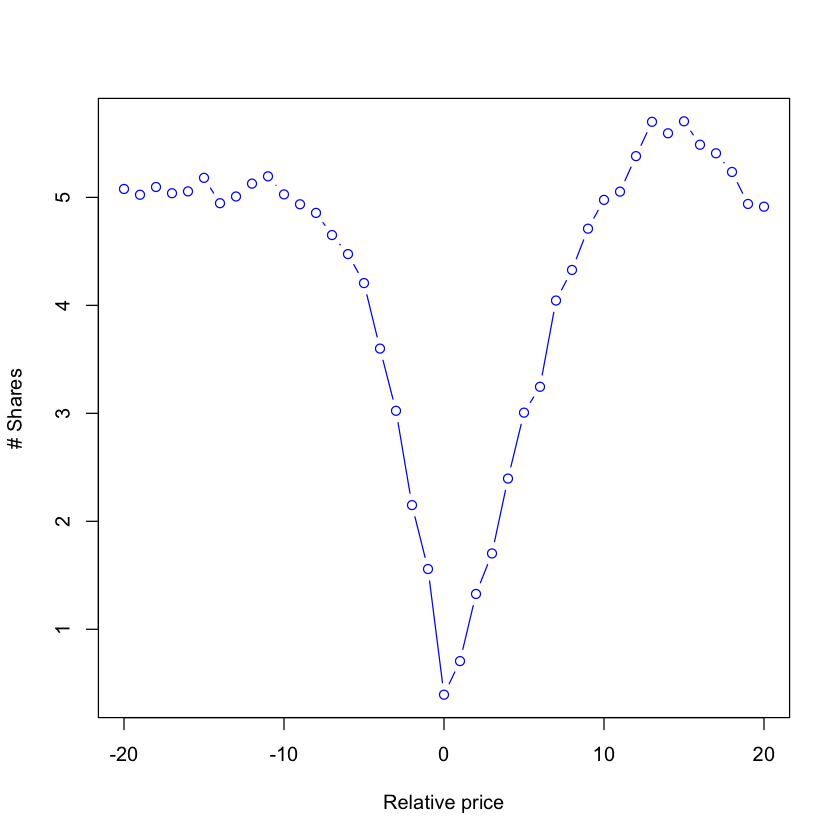

In [3]:
####### solution(b)

logging <- F 

# initialize parameters
alpha <- 1.0
mu <- 10.0
delta <- 1/5.0

# initialize order book
initializeBook5()

# Burn in for 100 events
for(count in 1:100){
  generateEvent()
}

# Average over 100,000 events
numEvents <- 100000 
numEvents <- 10000
set.seed(0)
avgBookShape <- bookShape(20)/numEvents

for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="blue", type="b")

In [4]:
####### solution(c)
Prob_L <- (Limit_Buy_num + Limit_Sell_num) / (2*L) / numEvents

print("The probability of a limit order is: ")
print(Prob_L)


[1] "The probability of a limit order is: "
[1] 0.008395


###### solution (d)

<br />$\sigma^2_{GO}(per\ event) = 0.083.$

<br />$\sigma ^2_{GO}(per\ LO)=\sigma ^2_{GO}(per\ event)/(2P_L)=0.083/0.0083445/2=4.980897$

<br />$\tilde \Delta_{GO}=\sqrt{\sigma^2_{GO}/(2\delta)}=\sqrt{4.97/(2*1/5)}=3.528773$

###### solution (e)

<br /> $\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2}=\frac{10 \times 1/5}{1^2}=2$

<br />$\tilde \Delta_{DA}=\sqrt{\sigma^2_{DA}/(2\delta)}=\sqrt{2/(2*1/5)}=2.236068$

###### Solution(f)

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\}
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

In [5]:
rho_BMP <- function(alpha, delta_lower_case, delta_capital, delta_capital_bar){
    
return(alpha / delta_lower_case * (1 - exp( -abs(delta_capital)/delta_capital_bar )))
    
}

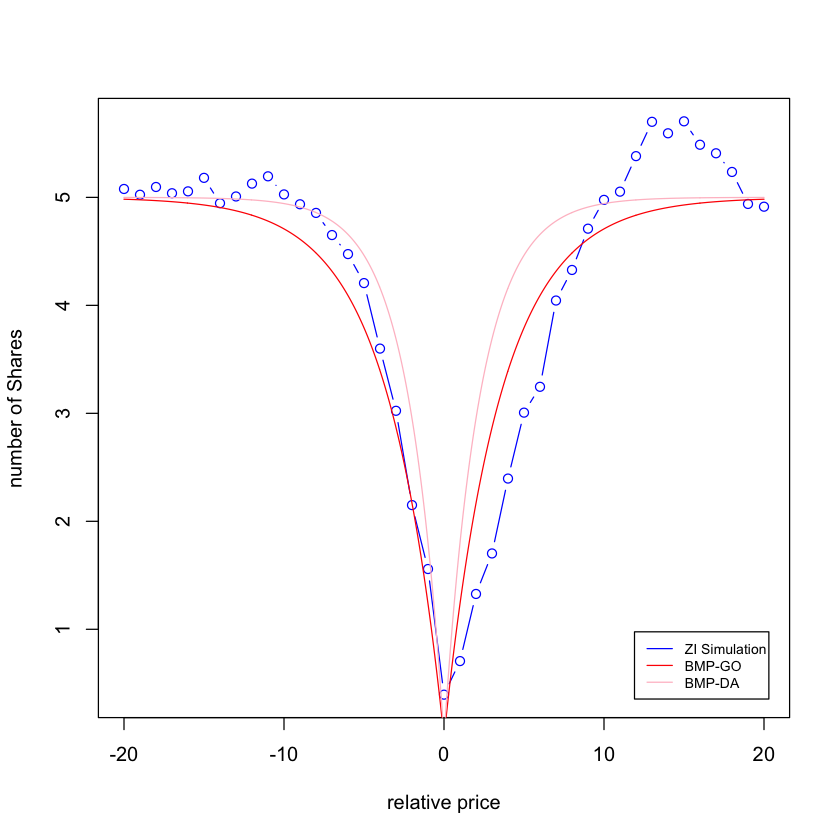

In [6]:
###### solution(g)

plot(-20:20, avgBookShape, main=NA, xlab="relative price", ylab="number of Shares", col="blue", type="b")
curve(rho_BMP(1,1/5,x,3.52),from=-20, to=20, n=1000, col="red", add=T)
curve(rho_BMP(1,1/5,x, 2.24),from=-20, to=20, n=1000,col="pink", add=T)
legend('bottomright', inset=0.03, legend=c('ZI Simulation', 'BMP-GO','BMP-DA'), lty=c(1, 1,1), col=c('blue','red','pink'), cex=0.7)

### 5. (6 points) <font color=blue> Score: 6/6 </font>

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

Solution:

(a)
Let $F(x)$ be the CDF of Student-$t$ distribution. $s$ is the bid-ask spread. The probability of the order being limit order is $F(s)$. Then the probability of the order as market order is $1-F(s)$. 

Then the ratio of limit to market orders as a function of the spread $s$ will be: $F(s)/(1-F(s))$.

When spread $s$ increase, the ratio will increase as well since $F(s)$ is monotonic increasing function.


(b) This empirically observed strategic behavior make the spread revert faster. The reason is that when the spread decrease, we will have more market orders, which will widen the spread.  When the spread increase, we will have more limit orders, which will decrease the spread.




### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>